In [1]:
# importa  pandas
import pandas as pd
# gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# Escalonamento multidmensional
from sklearn.manifold import MDS
# transformacion de atributos
from category_encoders import OneHotEncoder, OrdinalEncoder
# cálculo de distancias
from scipy.spatial.distance import pdist, squareform

1. Realizar el preprocesamiento de variables y examinar las relaciones entre los datos.

kaggle: https://www.kaggle.com/datasets/mishra5001/credit-card/data 

In [2]:
data = pd.read_csv("application_data.csv")

In [5]:
data.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
38219,144261,0,Cash loans,F,N,N,2,45000.0,646920.0,17194.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
76245,188418,0,Cash loans,F,N,N,1,112500.0,450000.0,13027.5,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
262375,403737,0,Cash loans,M,Y,Y,0,135000.0,113760.0,7533.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
41892,148505,0,Cash loans,F,N,Y,2,103500.0,78192.0,9409.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
215353,349532,1,Cash loans,M,Y,N,0,180000.0,704844.0,35986.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
22673,126383,0,Cash loans,F,N,Y,0,90000.0,513531.0,24835.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
204217,336754,0,Cash loans,M,Y,Y,0,202500.0,582804.0,25803.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
183625,312834,0,Cash loans,M,N,Y,0,157500.0,405000.0,16623.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
149035,272794,0,Cash loans,M,N,Y,0,72000.0,277969.5,16087.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
39316,145532,1,Cash loans,F,N,N,1,63000.0,284400.0,13387.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [10]:
data.describe(include="object").T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [18]:
for column_name in data.select_dtypes(include=["object_"]):
  print(column_name, "->", data[column_name].unique())
  print()

NAME_CONTRACT_TYPE -> ['Cash loans' 'Revolving loans']

CODE_GENDER -> ['M' 'F' 'XNA']

FLAG_OWN_CAR -> ['N' 'Y']

FLAG_OWN_REALTY -> ['Y' 'N']

NAME_TYPE_SUITE -> ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

NAME_INCOME_TYPE -> ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE -> ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS -> ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

NAME_HOUSING_TYPE -> ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

OCCUPATION_TYPE -> ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Wa

In [21]:
nominal = [
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "OCCUPATION_TYPE",
    "WEEKDAY_APPR_PROCESS_START",
    "ORGANIZATION_TYPE",
    "FONDKAPREMONT_MODE",
    "HOUSETYPE_MODE",
    "WALLSMATERIAL_MODE",
    "EMERGENCYSTATE_MODE",
]
ordinal = ["NAME_EDUCATION_TYPE"]
mappings = [
    {
        "col": "NAME_EDUCATION_TYPE",
        "mapping": {
            "Lower secondary": 0,
            "Secondary / secondary special": 1,
            "Incomplete higher": 2,
            "Higher education": 3,
            "Academic degree": 4
        }
    }
]

In [22]:
onehotenc = OneHotEncoder(cols = nominal)
ordinalenc = OrdinalEncoder(cols = ordinal, mapping = mappings)

In [23]:
data1 = onehotenc.fit_transform(data)

In [25]:
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,0,0,1,0,1,0,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
data2 = ordinalenc.fit_transform(data1)

In [27]:
data2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,0,0,1,0,1,0,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,0,1,0,0,1,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,1,0,0,1,0,1,0,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,1,0,0,1,0,1,0,1,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
data3  = data2.fillna(data2.median())

2. Realizar el escalamiento multidimensional de los datos y realizar la interpretación
correspondiente.

In [30]:
sample = data3.sample(1000)

In [31]:
sample.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
195302,326460,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
218330,352949,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
224946,360556,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
174636,302380,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
99146,215114,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,6.0


In [33]:
dist = squareform(pdist(sample,'euclidean'))
dist

array([[      0.        , 1449372.87135553, 1251109.70444693, ...,
        1227708.78403157, 1221344.29066029,  938163.12397546],
       [1449372.87135553,       0.        ,  228644.03514039, ...,
         357918.35143118,  375068.86155482,  557624.19061978],
       [1251109.70444693,  228644.03514039,       0.        , ...,
         277563.04469086,  262570.39797634,  345949.52464354],
       ...,
       [1227708.78403157,  357918.35143118,  277563.04469086, ...,
              0.        ,  120237.24268857,  438073.1024946 ],
       [1221344.29066029,  375068.86155482,  262570.39797634, ...,
         120237.24268857,       0.        ,  423849.80870881],
       [ 938163.12397546,  557624.19061978,  345949.52464354, ...,
         438073.1024946 ,  423849.80870881,       0.        ]])

In [34]:
mds = MDS(dissimilarity='precomputed',verbose=2)

In [35]:
transformed = mds.fit_transform(dist)

it: 0, stress 4.0847786630833274e+17
it: 1, stress 1.0829901372949915e+17
it: 2, stress 7.764785081721358e+16
it: 3, stress 6.865132974102334e+16
it: 4, stress 6.495765365791846e+16
it: 5, stress 6.324985230732696e+16
it: 6, stress 6.235864711889269e+16
it: 7, stress 6.1673573233994504e+16
it: 8, stress 6.097518865883368e+16
it: 9, stress 6.0122463635975704e+16
it: 10, stress 5.90016539103193e+16
it: 11, stress 5.752808126578173e+16
it: 12, stress 5.5652277405835624e+16
it: 13, stress 5.337157277188755e+16
it: 14, stress 5.073222190187224e+16
it: 15, stress 4.7756043734896904e+16
it: 16, stress 4.444722891444991e+16
it: 17, stress 4.080968074805811e+16
it: 18, stress 3.6930946339350776e+16
it: 19, stress 3.297997701739852e+16
it: 20, stress 2.9165022745942044e+16
it: 21, stress 2.5549674980303964e+16
it: 22, stress 2.2136954272013924e+16
it: 23, stress 1.899636554014989e+16
it: 24, stress 1.6199044268056556e+16
it: 25, stress 1.3801761959265638e+16
it: 26, stress 1.184397523776909e+16


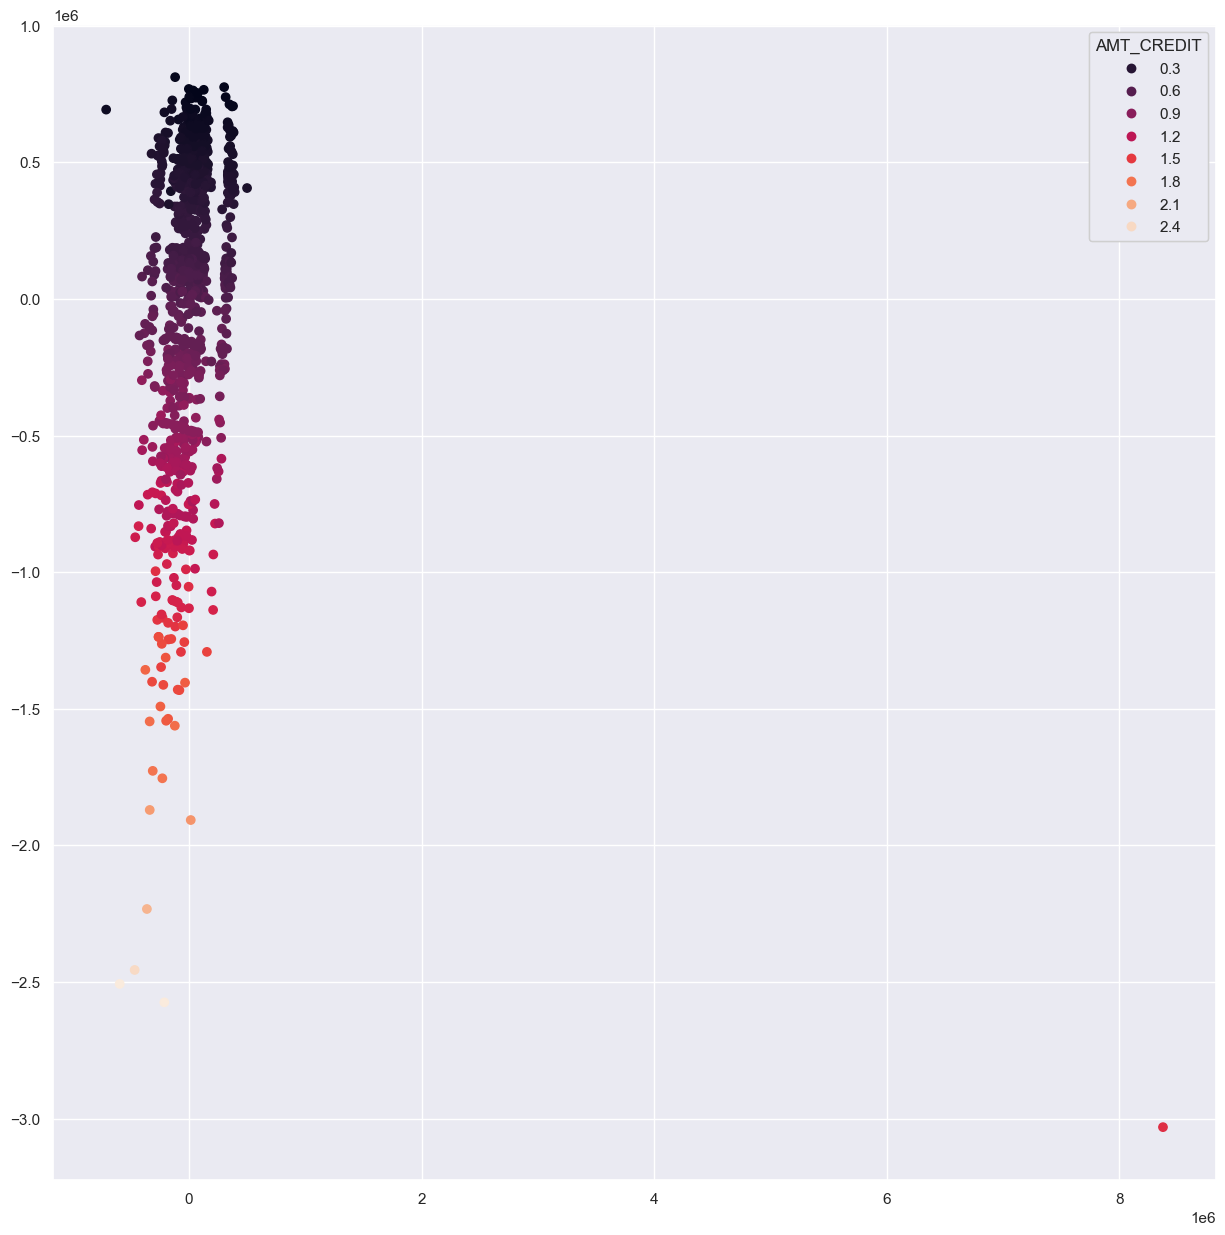

In [48]:
fig, ax = plt.subplots()

scatter = ax.scatter(transformed[:,0],transformed[:,1], c=sample["AMT_CREDIT"])

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="AMT_CREDIT")
ax.add_artist(legend)

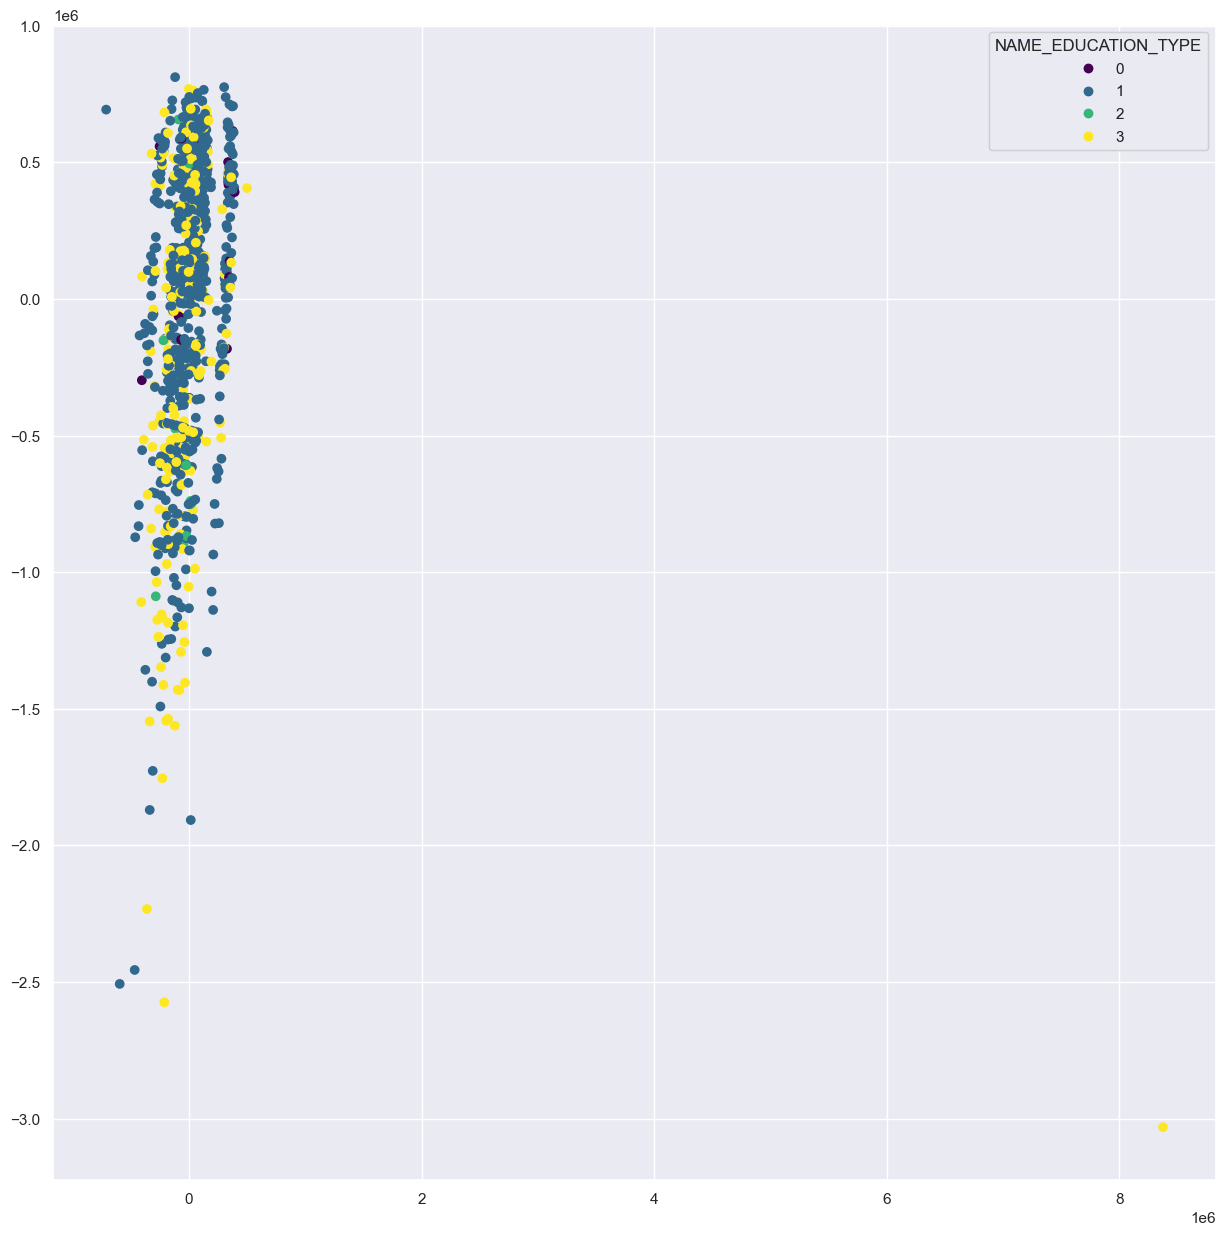

In [52]:
fig, ax = plt.subplots()

scatter = ax.scatter(
    transformed[:, 0], transformed[:, 1], c=sample["NAME_EDUCATION_TYPE"], cmap="viridis"
)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="NAME_EDUCATION_TYPE")
ax.add_artist(legend)

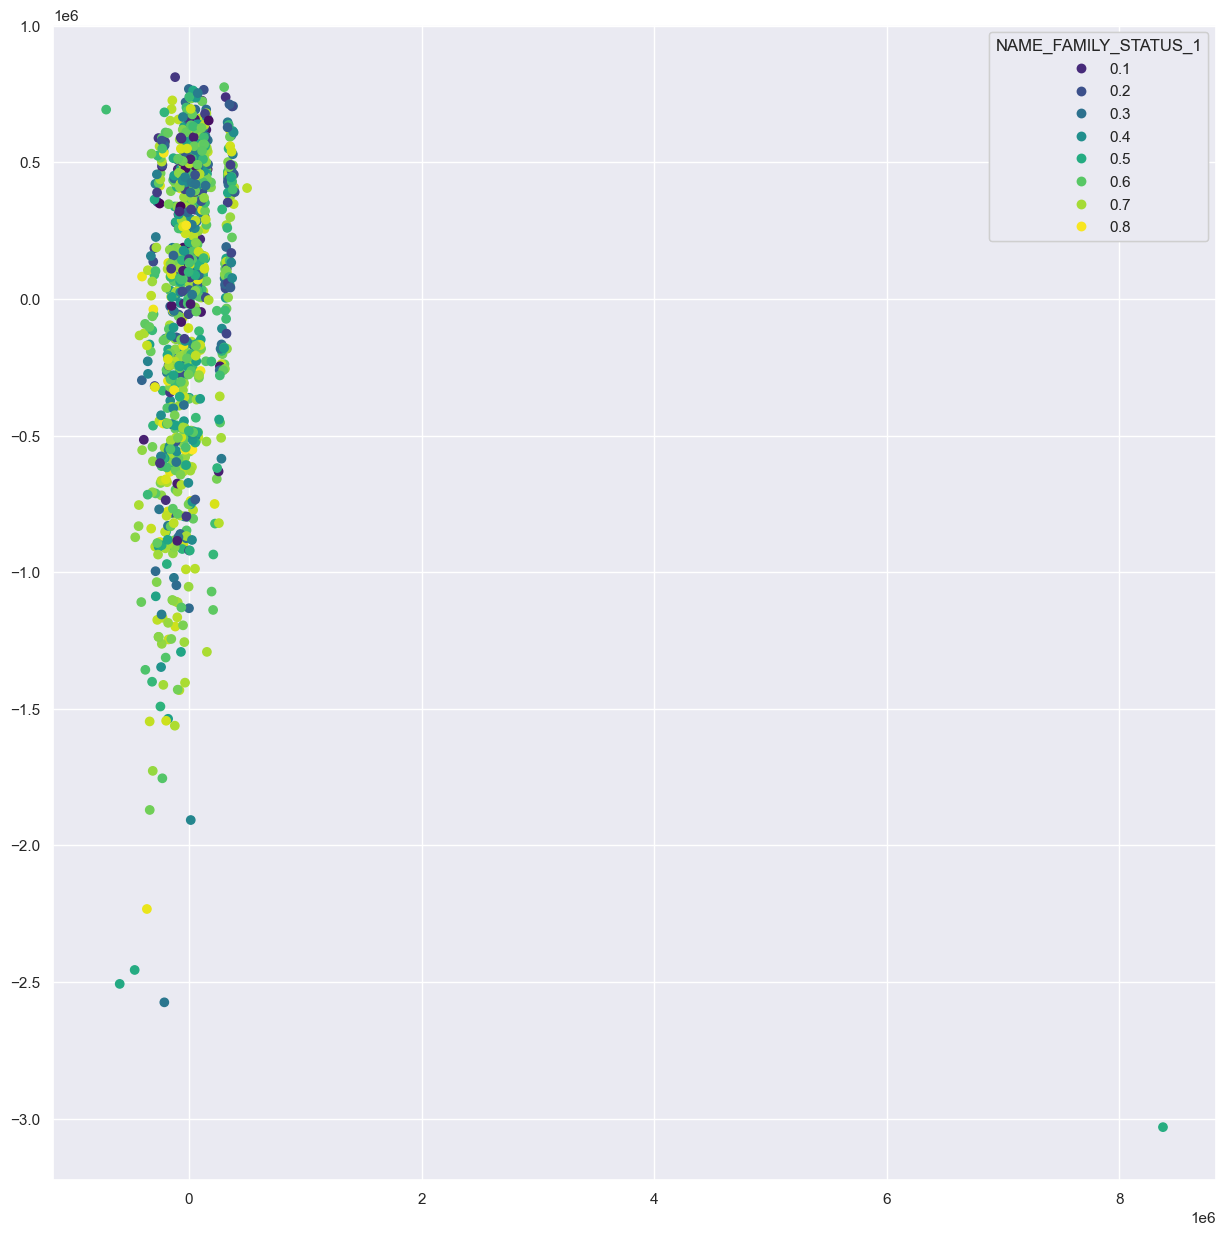

In [80]:
fig, ax = plt.subplots()

scatter = ax.scatter(
    transformed[:, 0], transformed[:, 1], c=sample["EXT_SOURCE_2"], cmap="viridis"
)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="NAME_FAMILY_STATUS_1")
ax.add_artist(legend)

<Axes: >

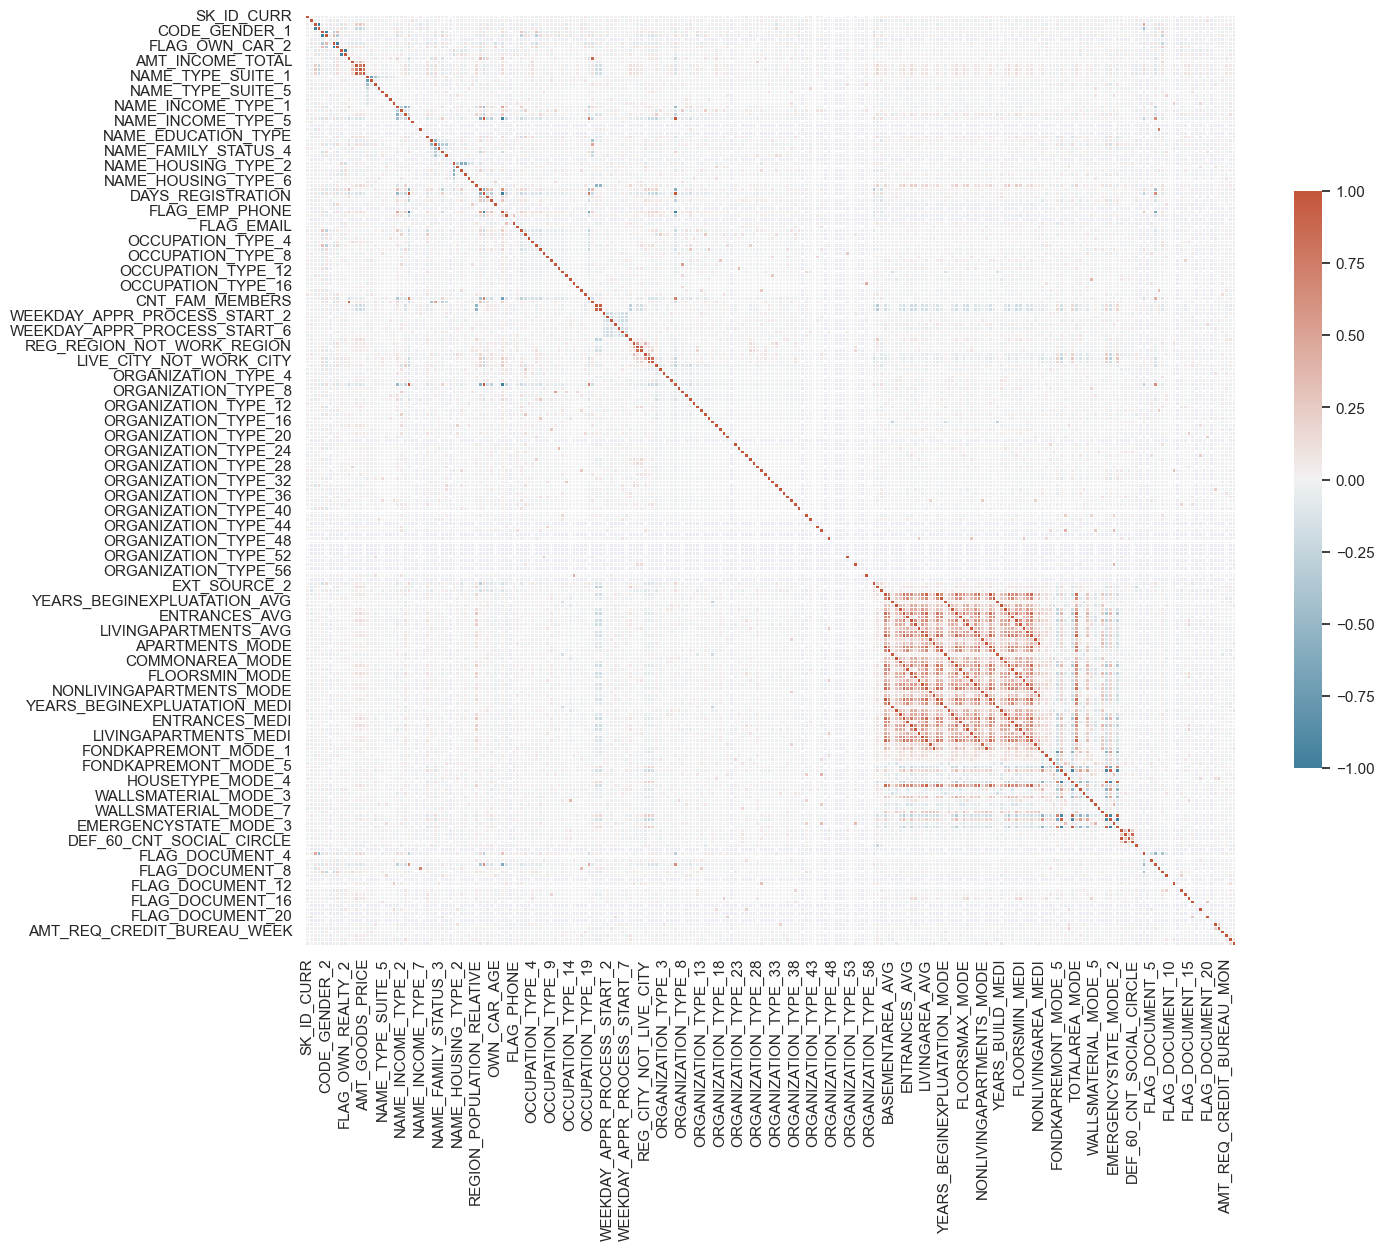

In [78]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(sample.corr(), cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

3. Crear una clase en python que reciba como parámetro el dataset y los transformadores correspondientes y pueda realizar el preprocesamiento de las variables. La clase debe interpretar la función fit que calibra los transformadores y la función transform que realiza la transformación propiamente dicha.

In [56]:
# 3. Crear una clase en python que reciba como parámetro el dataset y los transformadores correspondientes y pueda realizar el preprocesamiento de las variables. La clase debe interpretar la función fit que calibra los transformadores y la función transform que realiza la transformación propiamente dicha.

class Preprocessor:
    def __init__(self, data, onehotenc, ordinalenc):
        self.data = data
        self.onehotenc = onehotenc
        self.ordinalenc = ordinalenc

    def fit(self):
        self.onehotenc.fit(self.data)
        self.ordinalenc.fit(self.data)

    def transform(self):
        data1 = self.onehotenc.fit_transform(self.data)
        data2 = self.ordinalenc.fit_transform(data1)
        data3 = data2.fillna(data2.median())
        return data3

preprocessor = Preprocessor(data, onehotenc, ordinalenc)
data3 = preprocessor.transform()
data3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,1,0,0,1,0,1,0,1,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
